In [170]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('whatsapp-analysis')
jovian.set_colab_id('16D2jUZq6YU8IGARmb09g3WwPk96i_j7h')

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# whatsapp-analysis

Use the "Run" button to execute the code.

In [172]:
!pip install jovian --upgrade --quiet

In [173]:
import jovian

In [174]:
# Execute this to save new versions of the notebook
jovian.commit(project="whatsapp-analysis")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/victoradejumo2/whatsapp-analysis


'https://jovian.ai/victoradejumo2/whatsapp-analysis'

In [175]:
pip install emoji

In [176]:
import re
import pandas as pd
import numpy as np
from datetime import datetime as dt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import regex
import emoji
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import *
from plotly import express as px

In [177]:
df_one = open("/content/drive/MyDrive/WhatsApp Chat with Class of 09 🌟.txt", "r")
df_one.read()

'28/05/2020, 12:38 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n10/09/2017, 10:38 pm - +234 813 060 3531 created group "Class of 09 🌟💪🏽"\n28/05/2020, 12:38 pm - +234 813 060 3531 added you\n28/05/2020, 12:40 pm - +234 816 072 8519: Thank you for the birthday wishing\n28/05/2020, 12:40 pm - +234 816 072 8519: God bless you\n28/05/2020, 12:51 pm - +1 (613) 413-3431: Happy birthday Bunmi🎉🎊\n28/05/2020, 12:53 pm - +234 816 072 8519: Wishes###🤣😱\n28/05/2020, 12:54 pm - +234 816 072 8519: Thanks Tope😘\n28/05/2020, 12:54 pm - +234 706 052 5068: Happy birthday Bunmi\n28/05/2020, 1:04 pm - +234 816 072 8519: 🤗🤗🤗\n28/05/2020, 1:25 pm - +234 703 680 2820: Happy birthday beautiful Bunmi. God bless u dear\n28/05/2020, 1:56 pm - +234 816 072 8519: Amen thank you 🤗\n28/05/2020, 2:16 pm - +234 705 305 4329: Happy Birthday @2348160728519 \nPlenty Blessings!!! \n🎁🍾🎉🎊🎂\n28/05/2020, 3:20 pm - +234 816 072 

To extract the dates and time from the file

In [178]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

To get members of the group

In [179]:
def FindAuthor(s):
    s = s.split(":")
    if len(s)==2:  #date and time, and then 
      return True
    else:
      return False


def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(':') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [180]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
### Uploading exported chat file
conversationPath = "/content/drive/MyDrive/WhatsApp Chat with Class of 09 🌟.txt" # chat file
with open(conversationPath, encoding="utf-8") as fp:
    ### Skipping first line of the file because contains information related to something about end-to-end encryption
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line: #to stop if end of file has been reached.
          break
        line = line.strip()
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

Extracting the info and converting it to DataFrame

In [181]:
chat = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
chat.head()

,Date,Time,Author,Message
0,10/09/2017,10:38 pm,None,"+234 813 060 3531 created group ""Class of 09 🌟💪🏽"""
1,28/05/2020,12:38 pm,None,+234 813 060 3531 added you
2,28/05/2020,12:40 pm,+234 816 072 8519,Thank you for the birthday wishing
3,28/05/2020,12:40 pm,+234 816 072 8519,God bless you
4,28/05/2020,12:51 pm,+1 (613) 413-3431,Happy birthday Bunmi🎉🎊


In [182]:
chat["Date"] = pd.to_datetime(chat["Date"])

Basic Information

In [183]:
chat.shape

(5015, 4)

In [184]:
chat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5015 entries, 0 to 5014
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     5015 non-null   datetime64[ns]
 1   Time     5015 non-null   object        
 2   Author   4673 non-null   object        
 3   Message  5015 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 156.8+ KB


### Droping Nan values from dataset

In [185]:
chat.isnull().sum()

Date         0
Time         0
Author     342
Message      0
dtype: int64

In [186]:
chat = chat.dropna()
chat = chat.reset_index(drop=True)
chat.isnull().sum()

Date       0
Time       0
Author     0
Message    0
dtype: int64

In [187]:
chat

,Date,Time,Author,Message
0,2020-05-28,12:40 pm,+234 816 072 8519,Thank you for the birthday wishing
1,2020-05-28,12:40 pm,+234 816 072 8519,God bless you
2,2020-05-28,12:51 pm,+1 (613) 413-3431,Happy birthday Bunmi🎉🎊
3,2020-05-28,12:53 pm,+234 816 072 8519,Wishes###🤣😱
4,2020-05-28,12:54 pm,+234 816 072 8519,Thanks Tope😘
...,...,...,...,...
4668,2021-08-18,6:30 pm,+44 7710 031444,Zedda sounds nice
4669,2021-08-18,8:18 pm,+353 83 468 8086,Zedda
4670,2021-08-18,8:53 pm,+234 817 853 1313,Zedda
4671,2021-08-19,7:00 am,+44 7507 570307,"I’ll say Zedda, but Dala comes close"


### Getting Unique Authors

In [188]:
chat['Author'].unique()

array(['+234 816 072 8519', '+1 (613) 413-3431', '+234 706 052 5068',
       '+234 703 680 2820', '+234 705 305 4329', '+1 (443) 377-3706',
       '+44 7710 031444', '+234 905 620 6922', '+1 (336) 965-9277',
       '+234 701 947 6893', '+234 813 958 1653', '+353 83 468 8086',
       '+234 810 265 4207', '+234 814 320 3606', '+44 7469 899118',
       '+234 813 060 3531', 'Cephas', '+234 907 194 5876',
       '+234 811 855 6258', '+1 (210) 441-1214', '+234 813 906 7009',
       '+44 7378 729192', '+44 7507 570307', '+234 813 313 8837',
       '+1 (240) 351-9322', '+234 906 029 8731', '+1 (302) 252-8197',
       '+234 817 853 1313', '+234 703 856 9531', '+234 905 261 2760',
       '+234 809 320 1862', '+234 816 117 8740', '+234 812 414 4921',
       '+234 703 964 8479', '+234 806 751 4148', '+234 816 923 2959',
       '+234 807 798 3933', '+234 814 395 8544', '+234 807 394 3285',
       '+234 810 568 3018', '+234 818 888 5327', '+358 44 2354736',
       '+234 706 164 6899', '+234 808 805 

# Extracting Emojis

#### Getting the emojis into the dataframe

In [189]:
pattern = re.compile(r"|".join(map(re.escape, emoji.UNICODE_EMOJI["en"])))
chat["Emoji"] = chat["Message"].apply(lambda x: "".join(pattern.findall(x)))

In [190]:
chat

,Date,Time,Author,Message,Emoji
0,2020-05-28,12:40 pm,+234 816 072 8519,Thank you for the birthday wishing,
1,2020-05-28,12:40 pm,+234 816 072 8519,God bless you,
2,2020-05-28,12:51 pm,+1 (613) 413-3431,Happy birthday Bunmi🎉🎊,🎉🎊
3,2020-05-28,12:53 pm,+234 816 072 8519,Wishes###🤣😱,🤣😱
4,2020-05-28,12:54 pm,+234 816 072 8519,Thanks Tope😘,😘
...,...,...,...,...,...
4668,2021-08-18,6:30 pm,+44 7710 031444,Zedda sounds nice,
4669,2021-08-18,8:18 pm,+353 83 468 8086,Zedda,
4670,2021-08-18,8:53 pm,+234 817 853 1313,Zedda,
4671,2021-08-19,7:00 am,+44 7507 570307,"I’ll say Zedda, but Dala comes close",


#### Total number of emojis in the group chat

In [191]:
emojis = chat.Emoji.str.len()
Total_emoji = np.sum(emojis)
print(f"Total number of emojis is {Total_emoji}")

Total number of emojis is 6340


Most used emojis

In [192]:
total_emojis_list = list([a for b in chat["Emoji"] for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df.head(5)

,emoji,count
0,🎉,539
1,🤣,430
2,😂,427
3,🤗,411
4,🥳,384


# URL Information

In [193]:
urlform = r'(https?://S+)'
chat["URL"] = chat["Message"].apply(lambda x: re.findall(urlform, x))
chat

,Date,Time,Author,Message,Emoji,URL
0,2020-05-28,12:40 pm,+234 816 072 8519,Thank you for the birthday wishing,,[]
1,2020-05-28,12:40 pm,+234 816 072 8519,God bless you,,[]
2,2020-05-28,12:51 pm,+1 (613) 413-3431,Happy birthday Bunmi🎉🎊,🎉🎊,[]
3,2020-05-28,12:53 pm,+234 816 072 8519,Wishes###🤣😱,🤣😱,[]
4,2020-05-28,12:54 pm,+234 816 072 8519,Thanks Tope😘,😘,[]
...,...,...,...,...,...,...
4668,2021-08-18,6:30 pm,+44 7710 031444,Zedda sounds nice,,[]
4669,2021-08-18,8:18 pm,+353 83 468 8086,Zedda,,[]
4670,2021-08-18,8:53 pm,+234 817 853 1313,Zedda,,[]
4671,2021-08-19,7:00 am,+44 7507 570307,"I’ll say Zedda, but Dala comes close",,[]


#### Total number of URLs

In [194]:
URLs = chat.URL.str.len()
total_url = np.sum(URLs)
print(f"Total number of URL is {total_url}")

Total number of URL is 0


# Media Info

In [195]:
MEDIAPATTERN = r'<Media omitted>'
chat['Media_File'] = chat.Message.apply(lambda x : re.findall(MEDIAPATTERN, x))
chat

,Date,Time,Author,Message,Emoji,URL,Media_File
0,2020-05-28,12:40 pm,+234 816 072 8519,Thank you for the birthday wishing,,[],[]
1,2020-05-28,12:40 pm,+234 816 072 8519,God bless you,,[],[]
2,2020-05-28,12:51 pm,+1 (613) 413-3431,Happy birthday Bunmi🎉🎊,🎉🎊,[],[]
3,2020-05-28,12:53 pm,+234 816 072 8519,Wishes###🤣😱,🤣😱,[],[]
4,2020-05-28,12:54 pm,+234 816 072 8519,Thanks Tope😘,😘,[],[]
...,...,...,...,...,...,...,...
4668,2021-08-18,6:30 pm,+44 7710 031444,Zedda sounds nice,,[],[]
4669,2021-08-18,8:18 pm,+353 83 468 8086,Zedda,,[],[]
4670,2021-08-18,8:53 pm,+234 817 853 1313,Zedda,,[],[]
4671,2021-08-19,7:00 am,+44 7507 570307,"I’ll say Zedda, but Dala comes close",,[],[]


Total number of media files

In [196]:
media_files = chat.Media_File.str.len()
total_media = np.sum(media_files)
print(f"Total number of media file is {total_media}")

Total number of media file is 311


# Total number of messages

In [197]:
Total_number = chat["Message"].count()
Total_number

4673

# Daily Analysis of Data

In [198]:
chat

,Date,Time,Author,Message,Emoji,URL,Media_File
0,2020-05-28,12:40 pm,+234 816 072 8519,Thank you for the birthday wishing,,[],[]
1,2020-05-28,12:40 pm,+234 816 072 8519,God bless you,,[],[]
2,2020-05-28,12:51 pm,+1 (613) 413-3431,Happy birthday Bunmi🎉🎊,🎉🎊,[],[]
3,2020-05-28,12:53 pm,+234 816 072 8519,Wishes###🤣😱,🤣😱,[],[]
4,2020-05-28,12:54 pm,+234 816 072 8519,Thanks Tope😘,😘,[],[]
...,...,...,...,...,...,...,...
4668,2021-08-18,6:30 pm,+44 7710 031444,Zedda sounds nice,,[],[]
4669,2021-08-18,8:18 pm,+353 83 468 8086,Zedda,,[],[]
4670,2021-08-18,8:53 pm,+234 817 853 1313,Zedda,,[],[]
4671,2021-08-19,7:00 am,+44 7507 570307,"I’ll say Zedda, but Dala comes close",,[],[]


In [199]:
#Matching the days with the dates

weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}

chat['Day'] = chat['Date'].dt.weekday.map(weeks)
chat = chat[['Date','Day','Time','Author','Message', 'Emoji', 'URL', 'Media_File']]
chat['Day'] = chat['Day'].astype('category')
chat

,Date,Day,Time,Author,Message,Emoji,URL,Media_File
0,2020-05-28,Thrusday,12:40 pm,+234 816 072 8519,Thank you for the birthday wishing,,[],[]
1,2020-05-28,Thrusday,12:40 pm,+234 816 072 8519,God bless you,,[],[]
2,2020-05-28,Thrusday,12:51 pm,+1 (613) 413-3431,Happy birthday Bunmi🎉🎊,🎉🎊,[],[]
3,2020-05-28,Thrusday,12:53 pm,+234 816 072 8519,Wishes###🤣😱,🤣😱,[],[]
4,2020-05-28,Thrusday,12:54 pm,+234 816 072 8519,Thanks Tope😘,😘,[],[]
...,...,...,...,...,...,...,...,...
4668,2021-08-18,Wednesday,6:30 pm,+44 7710 031444,Zedda sounds nice,,[],[]
4669,2021-08-18,Wednesday,8:18 pm,+353 83 468 8086,Zedda,,[],[]
4670,2021-08-18,Wednesday,8:53 pm,+234 817 853 1313,Zedda,,[],[]
4671,2021-08-19,Thrusday,7:00 am,+44 7507 570307,"I’ll say Zedda, but Dala comes close",,[],[]


Total number of messages for each day in a week

In [200]:
l = chat.Day.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_chat = chat[chat["Day"] == l[i]]
  ### req_chat will contain messages of only one particular user
  print(l[i],' - ',req_chat.shape[0])
  chat["chat_per_day"] = req_chat.shape[0]

Thrusday  -  730
Friday  -  604
Saturday  -  839
Sunday  -  597
Monday  -  646
Wednesday  -  598
Tuesday  -  659


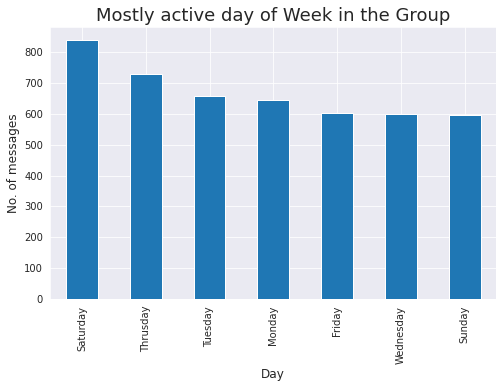

In [201]:
### Mostly Active day in the Group
plt.figure(figsize=(8,5))
active_day = chat['Day'].value_counts()

a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of Week in the Group',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

Most Active Time of the Day

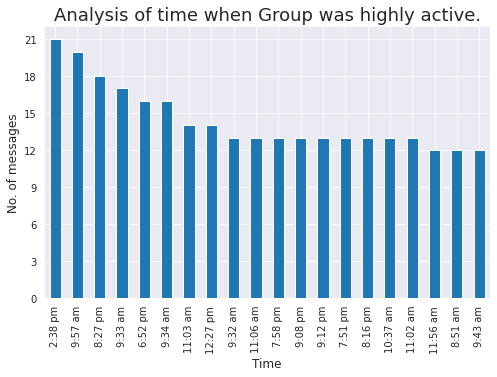

In [202]:
plt.figure(figsize=(8,5))
t = chat['Time'].value_counts().head(20)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when Group was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

The Hour of the Day the Group was Active

In [203]:
lst = []
for i in chat['Time'] :
    out_time = dt.strftime(dt.strptime(i,"%I:%M %p"),"%H:%M")
    lst.append(out_time)
chat['24H_Time'] = lst
chat['Hours'] = chat['24H_Time'].apply(lambda x : x.split(':')[0])

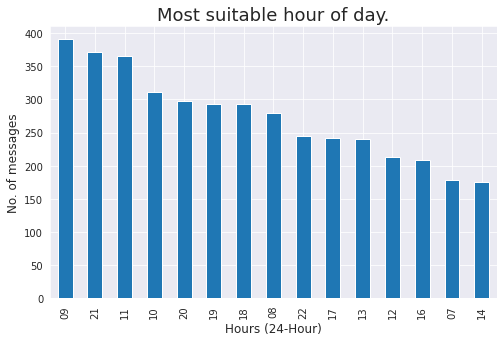

In [204]:
plt.figure(figsize=(8,5))
std_time = chat['Hours'].value_counts().head(15)
s_T = std_time.plot.bar()
s_T.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Hours (24-Hour)',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Most suitable hour of day.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

Active Month

In [205]:
chat['Year'] = chat['Date'].dt.year

In [206]:
chat['Mon'] = chat['Date'].dt.month

In [207]:
months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}
chat['Month'] = chat['Mon'].map(months)

In [208]:
chat.drop('Mon',axis=1,inplace=True)

In [209]:
chat["Month_Year"] = chat.apply(lambda x : x["Month"] + "-" + str(x["Year"]), axis=1)

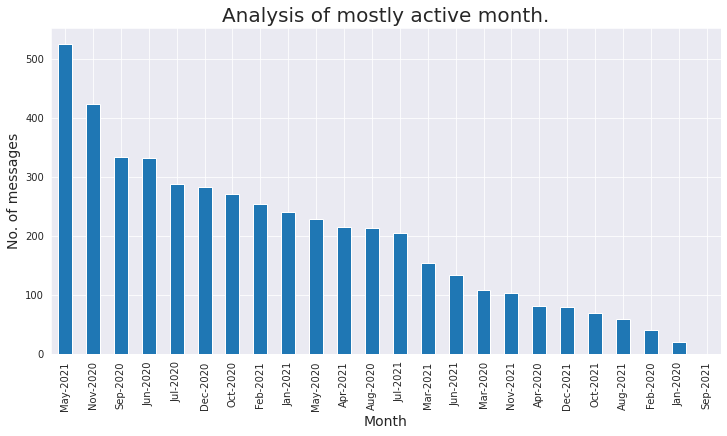

In [213]:
plt.figure(figsize=(12,6))
active_month = chat['Month_Year'].value_counts()
a_m = active_month
a_m.plot.bar()
plt.xlabel('Month',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of mostly active month.',fontdict={'fontsize': 20,
        'fontweight': 8})
plt.show()

Active Chats per year

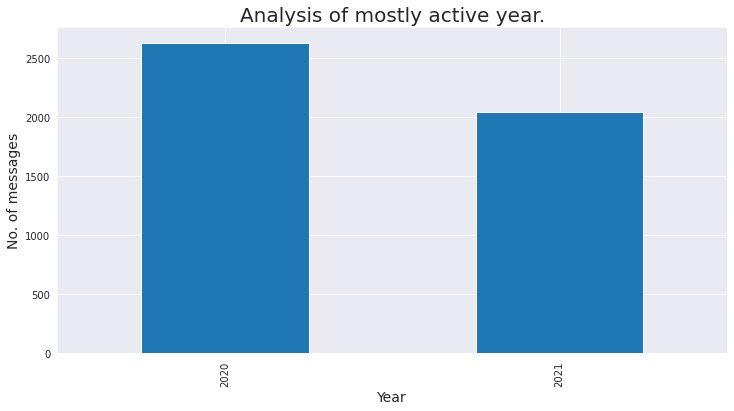

In [214]:
plt.figure(figsize=(12,6))
active_month = chat['Year'].value_counts()
a_m = active_month
a_m.plot.bar()
plt.xlabel('Year',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of mostly active year.',fontdict={'fontsize': 20,'fontweight': 8})
plt.show()

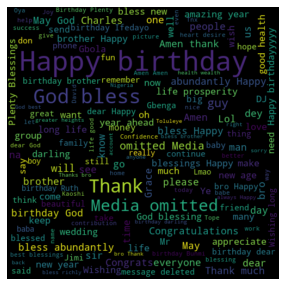

In [216]:
word = " ".join(review for review in chat.Message)

#Creating a word cloud 
wordcloud = WordCloud(width = 500, height =500 , background_color="black",min_font_size = 10).generate(word)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

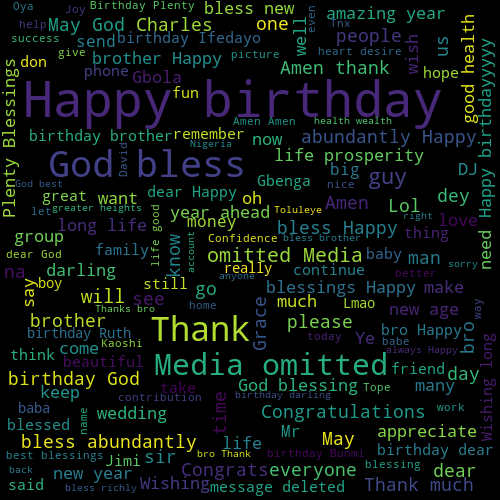

In [217]:
wordcloud.to_image()

From the above analysis, findings are as follows:
1. Most active chats where in the Year 2020 due to the pandemic and people interacted more than 2021
2. Saturdays are more preferrable to chat than weekdays